In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
colors = sns.color_palette(n_colors=2)

In [4]:
beers_df = pd.read_csv("./cervezas.csv", sep=";")
beers_df

,Cajas,Distancia,Tiempo
0,10,30,24
1,15,25,27
2,10,40,29
3,20,18,31
4,25,22,25
5,18,31,33
6,12,26,26
7,14,34,28
8,16,29,31
9,22,37,39


In [5]:
from min_sqrs import min_sqrs, square_error, mean_square_error
from utils import add_bias

In [6]:
X = beers_df[["Cajas", "Distancia"]].to_numpy()
X = add_bias(X)
X

array([[10., 30.,  1.],
       [15., 25.,  1.],
       [10., 40.,  1.],
       [20., 18.,  1.],
       [25., 22.,  1.],
       [18., 31.,  1.],
       [12., 26.,  1.],
       [14., 34.,  1.],
       [16., 29.,  1.],
       [22., 37.,  1.],
       [24., 20.,  1.],
       [17., 25.,  1.],
       [13., 27.,  1.],
       [30., 23.,  1.],
       [24., 33.,  1.]])

In [7]:
Y = beers_df[["Tiempo"]].to_numpy()
Y

array([[24],
       [27],
       [29],
       [31],
       [25],
       [33],
       [26],
       [28],
       [31],
       [39],
       [33],
       [30],
       [25],
       [42],
       [40]])

In [8]:
linear_f = lambda x : x
constant_f = lambda _ : 1

In [9]:
K_fs = [linear_f, linear_f, constant_f]

In [10]:
K = min_sqrs(X, K_fs, Y)
K

array([[0.87720461],
       [0.45592077],
       [2.31120209]])

In [11]:
f = lambda x1, x2 : K[0]*x1 + K[1]*x2 + K[2]

In [12]:
vec_f = np.vectorize(f)

In [13]:
F = vec_f(X[:,0], X[:,1])
F = F.reshape((F.size, 1))
F

array([[24.76087132],
       [26.86729052],
       [29.32007902],
       [28.06186818],
       [34.27157432],
       [32.23442898],
       [24.69159746],
       [30.09337284],
       [29.56817821],
       [38.47877205],
       [32.48252817],
       [28.62169974],
       [26.02472284],
       [39.11351815],
       [38.40949819]])

In [14]:
error = Y - F
error

array([[-0.76087132],
       [ 0.13270948],
       [-0.32007902],
       [ 2.93813182],
       [-9.27157432],
       [ 0.76557102],
       [ 1.30840254],
       [-2.09337284],
       [ 1.43182179],
       [ 0.52122795],
       [ 0.51747183],
       [ 1.37830026],
       [-1.02472284],
       [ 2.88648185],
       [ 1.59050181]])

In [15]:
beers_df['Error Cuadrático'] = abs(error)
beers_df

,Cajas,Distancia,Tiempo,Error Cuadrático
0,10,30,24,0.760871
1,15,25,27,0.132709
2,10,40,29,0.320079
3,20,18,31,2.938132
4,25,22,25,9.271574
5,18,31,33,0.765571
6,12,26,26,1.308403
7,14,34,28,2.093373
8,16,29,31,1.431822
9,22,37,39,0.521228


In [16]:
square_error(Y, F)

118.37473388700424

In [17]:
mean_square_error(Y, F)

7.891648925800283

In [18]:
f(29, 26).item()

39.60407585032653

Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

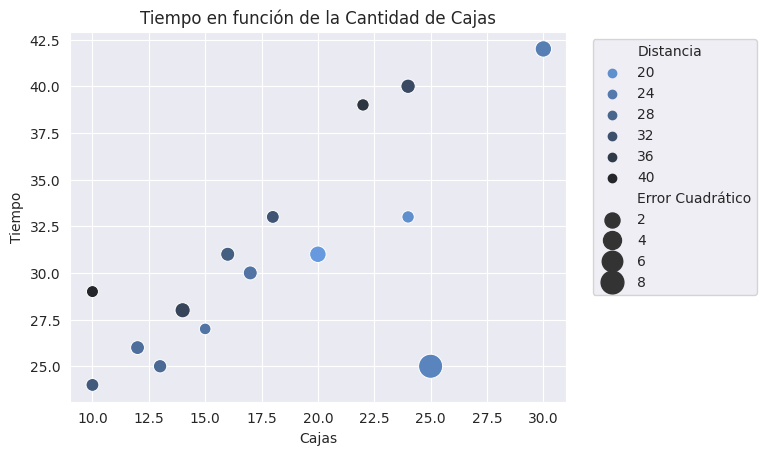

In [19]:
sns.scatterplot(beers_df, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

In [20]:
K_fs = [linear_f, constant_f]

In [21]:
K = min_sqrs(add_bias(X[:, 0:1]), K_fs, Y)
K

array([[ 0.68452381],
       [18.5452381 ]])

In [22]:
f = lambda x : K[0]*x + K[1]
vec_f = np.vectorize(f)

F = vec_f(X[:, 0:1])
F

array([[25.39047619],
       [28.81309524],
       [25.39047619],
       [32.23571429],
       [35.65833333],
       [30.86666667],
       [26.75952381],
       [28.12857143],
       [29.49761905],
       [33.6047619 ],
       [34.97380952],
       [30.18214286],
       [27.44404762],
       [39.08095238],
       [34.97380952]])

In [23]:
plot_X = np.arange(X[:, 0:1].min(), X[:, 0:1].max(), 0.1)
plot_Y = vec_f(plot_X)

Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

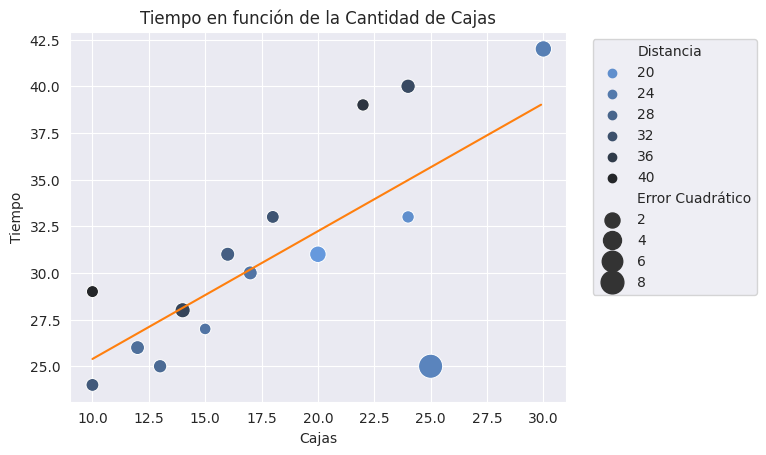

In [24]:
sns.scatterplot(beers_df, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.plot(plot_X, plot_Y, color=colors[1])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

In [25]:
X_aux = np.delete(X, 4, axis=0)
Y_aux = np.delete(Y, 4, axis=0)

In [26]:
K_aux = min_sqrs(add_bias(X_aux[:, 0:1]), K_fs, Y_aux)
K_aux

array([[ 0.86157254],
       [16.20819491]])

In [27]:
f_aux = lambda x : K_aux[0]*x + K_aux[1]
vec_f_aux = np.vectorize(f_aux)

F_aux = vec_f_aux(X_aux[:, 0:1])
F_aux

array([[24.82392027],
       [29.13178295],
       [24.82392027],
       [33.43964563],
       [31.71650055],
       [26.54706534],
       [28.27021041],
       [29.99335548],
       [35.1627907 ],
       [36.88593577],
       [30.85492802],
       [27.40863787],
       [42.05537099],
       [36.88593577]])

In [28]:
plot_X_aux = np.arange(X_aux[:, 0:1].min(), X_aux[:, 0:1].max(), 0.1)
plot_Y_aux = vec_f_aux(plot_X_aux)

Text(0.5, 1.0, 'Tiempo en función de la Cantidad de Cajas')

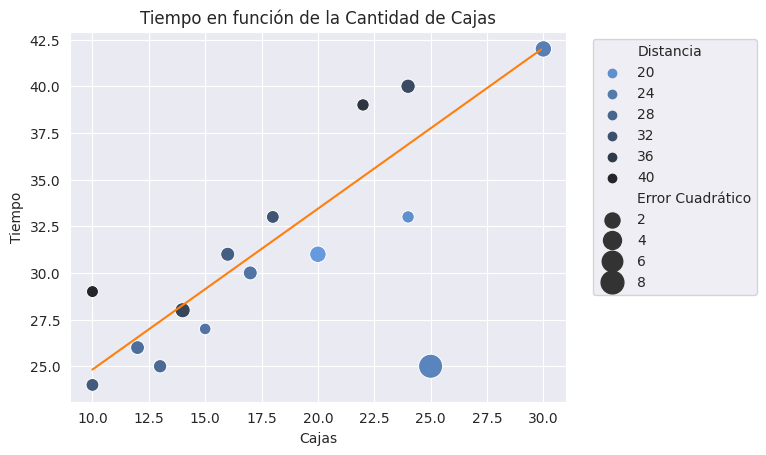

In [29]:
sns.scatterplot(beers_df, x="Cajas", y="Tiempo", color=colors[0], hue="Distancia", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.plot(plot_X_aux, plot_Y_aux, color=colors[1])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Cantidad de Cajas")

Text(0.5, 1.0, 'Tiempo en función de la Distancia')

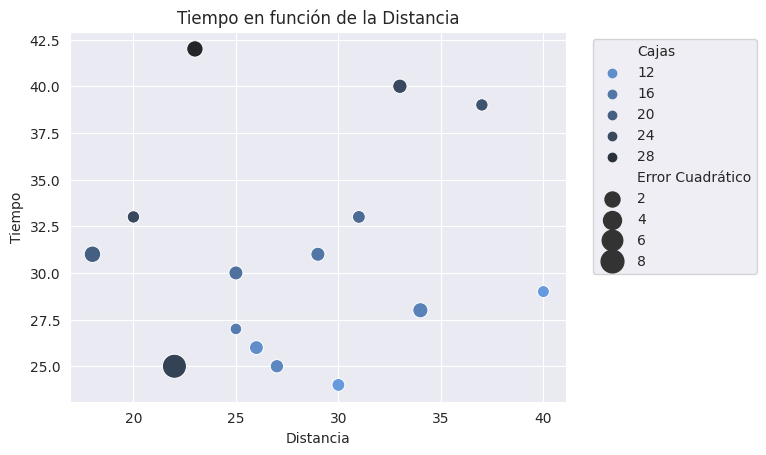

In [30]:
sns.scatterplot(beers_df, x="Distancia", y="Tiempo", hue="Cajas", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Tiempo en función de la Distancia")

Text(0.5, 1.0, 'Cantidad de Cajas en función de la Distancia')

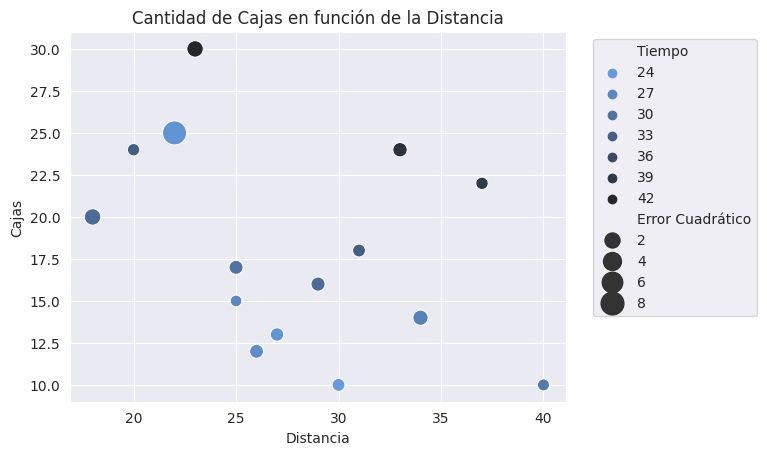

In [31]:
sns.scatterplot(beers_df, x="Distancia", y="Cajas", hue="Tiempo", size="Error Cuadrático", palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), sizes=(70,300))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Cantidad de Cajas en función de la Distancia")